<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
# plt.style.use('dark_background')
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p>Файл открыт, разделитель значений - табуляция. <p>Зададим стиль для plt - темная тема.</p>   
</div>

In [43]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
Посмотрим первые 10 строк: первое знакомство с базой данных, уже с первых строк видны пропуски, есть типы значений int, float, object, посмотрим более детально.
</div>

In [3]:
#общие сведения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
# пропуски в процентках
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>
    <p>Есть пропущенные данные в столбцах: </p>
        <ul>
            <li>ceiling_height      39%</li>
            <li>floors_total        0,4%</li>
            <li>living_area         8%</li>
            <li>is_apartment        88%</li>
            <li>kitchen_area        10%</li>
            <li>balcony             49%</li>
            <li>locality_name       0,2%</li>
            <li>airports_nearest    23%</li>
            <li>cityCenters_nearest 23%</li>
            <li>parks_around3000    23%</li>
            <li>parks_nearest       66%</li>
            <li>ponds_around3000    23%</li>
            <li>ponds_nearest       62%</li>
            <li>days_exposition     13%</li>
        </ul>
</div>

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
Названия колонок нормальные, изменять не требуется
</div>

In [6]:
display(df.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
В сводной таблице видны вбросовые значения (total_area - 900 кв м, это перебор, или 19 комнат, высота потолков 100 м и т.д.) Изучим их более внимательно на следующем шаге
</div>

### Вывод

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
Открыт и поверхностно проанализирован датасет - с ним придется поработать, есть как вбросовые значения, так и уйма пропусков, нужно будет поработать с каждым столбцом отдельно. С другой стороны данных достаточно для дальнейшей работы.
</div>

## Предобработка данных

| Столбец              | Значений non-null  | Пропуски, в %  | Исходный тип   |   Замена типа  |   Замена nan |
| :------------------  |:------------------:|:--------------:|:--------------:|:--------------:|:-----------------:|
| total_images         |       23699        |       0        |     int64      |  не требуется  | не требуется
| last_price           |       23699        |       0        |     float64    |     int64      | не требуется
| total_area           |       23699        |       0        |     float64    |    не нужно    | не требуется
| first_day_exposition |       23699        |       0        |     object     |    datetime    | не требуется
| rooms                |       23699        |       0        |     int64      |  не требуется  | не требуется
| ceiling_height       |       14504        |      38        |     float64    |  не требуется  | на median
| floors_total         |       23613        |      0.3       |     float64    |     int64      | на median
| living_area          |       21796        |       8        |     float64    |  не требуется  | на median
| floor                |       23699        |       0        |     int64      |  не требуется  | не требуется
| is_apartment         |        2775        |      88        |     object     |     bool       | на False (не указано, значит нет)
| studio               |       23699        |       0        |     bool       |  не требуется  | не требуется
| open_plan            |       23699        |       0        |     bool       |  не требуется  | не требуется
| kitchen_area         |       21421        |       10       |     float64    |  не требуется  | на median
| balcony              |       12180        |       49       |     float64    |     int64      | на 0 (не уазано, значит нет)
| locality_name        |       23650        |      0.2       |     object     |  не требуется  | на 'unknown'
| airports_nearest     |       18157        |       23       |     float64    |      int64     | на mean
| cityCenters_nearest  |       18180        |       23       |     float64    |      int64     | на median
| parks_around3000     |       18181        |       23       |     float64    |      int64     | на 0 (не указано, значит нет)
| parks_nearest        |       8079         |       66       |     float64    |  не требуется  | воздержимся от изменений
| ponds_around3000     |       18181        |       23       |     float64    |      int64     | на 0 (не указано, значит нет)
| ponds_nearest        |       9110         |       64       |     float64    |  не требуется  | воздержимся от изменений
| days_exposition      |       20518        |       13       |     float64    |      int64     | на median
    
        
</div>

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>last_price</b>
<p> Ничего не мешает нам поменят значения на int64.
</div>

In [44]:
df['last_price'] = df['last_price'].astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>first_day_exposition</b>
<p> Изменим тип данных на datetime
</div>

In [45]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>ceiling_height</b>
<p> Учитывая вбросы (высота потолка до 100 метров), заменим nan на медианное значение. 
<p> Так, как высота потолка может быть в долях метра, оставим тип float64
</div>

In [47]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>ceiling_height</b>
<p> Учитывая вбросы (высота потолка до 100 метров), заменим nan на медианное значение. 
<p> Так, как высота потолка может быть в долях метра, оставим тип float64
</div>

In [48]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>floors_total</b>
<p> Всего этажей от 1 до 60, что вполне может быть. 
<p> Так, как высота потолка может быть в долях метра, оставим тип float64
</div>

In [49]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean()).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>living_area</b>
<p> Жилая площадь принимает значения от 2 до 409,7 метров. Вероятно, есть вбросы, поэтому используем median. 
<p> Жилая площадь очень важный параметр, чтобы его округлять, оставим тип float64
</div>

In [50]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>is_apartment</b>
<p> Апартаменты. Отсутствующие значения вероятно указывают на то, что это не аппартаменты, заменим nan на False.
<p> Приведем к типу bool.
</div>

In [51]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>kitchen_area</b>
<p> Площадь кухни достаточнов важный параметр, влияющий на цену. Вероятно есть вбросы (размер от 1.3 до 112 м кв), заменим nan на median.
<p> Тип float менять не будем (по тем же причинам, что и другие площади).
</div>

In [52]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>balcony</b>
<p> Если балкон не указан, значит его нет: заменим nan на 0.
<p> А тип изнменим на int64 (для экономии памяти и большей наглядности)
</div>

In [53]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>locality_name</b>
<p> Ячейка с типом данных object(str). Проверим на скрытые дубликаты
</div>

In [54]:
print(len(df['locality_name'].unique()))
display(df['locality_name'].unique())


365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> 365 значений, но возможно в них есть скрытые дубликаты. Создадим функцию, которая сохраняет столько имя населенного пунтка, без уточнения его типа, а тажке меняет букву ё на е. 
<p> Но перед этим, чтобы избавиться от nan заменим пропущенные значения на 'unknown'
       
</div>

In [55]:
df['locality_name'] = df['locality_name'].fillna('unknown')


def clear_locality_name(text):
    list_ = ['посёлок', 'поселок', 'городской', 'городского', 'типа', 'садовое', 'товарищество', ' ', 'деревня', 'село', '']
    return list(set(text.split()) - set(list_))[0].replace('ё', 'е')
     
# создадим новый столбец, применив свою функцию к элементам столбца 'locality_name'
df['new_local_name'] = df['locality_name'].apply(clear_locality_name)

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Проверим какие элементы у нас вошли в новый столбец
</div>

In [56]:
df['new_local_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая',
       'Павловск', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское', 'Село',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',
       'Александровская', 'Лопухинка', 'Пик

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> и как изменилось количество уникальных значений
</div>

In [57]:
len(df['new_local_name'].unique())

297

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Количество уникаольных значений уменьшилось с 365 до 296. Значит были дубликаты, и мы от них избавились.
</div>

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>airports_nearest</b>
    <p> Разброс значений от 0 до 85 км, что похоже на правду. Заменим пропуски на среднее значение по столбцу. А тип данных изменим на int64.
</div>

In [58]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].mean()).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>cityCenters_nearest</b>
    <p> Разброс значений 181 м 0 до 66 км, значимых вбросов нет. Заменим пропуски на среднее значение по столбцу. А тип данных изменим на int64.
</div>

In [59]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].mean()).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>parks_around3000	</b>
    <p> 23% пропусков, вероятно, если значение не указано, значит и нет парка. Заменим nan на 0, тип данных изменим на int64.
</div>

In [60]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>parks_nearest</b>
    <p> 66% пропусков, диапазон значений от 1 до 3190 метров. 
    <p> Проверим, есть ли парки в пределах 3000 м от квартиры.
</div>

In [61]:
display(df.query('parks_nearest.isna() == True')['parks_around3000'].value_counts())
# df['parks_nearest'] = df['parks_nearest'].fillna()

0    15620
Name: parks_around3000, dtype: int64

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Пропуски находятся в тех же строках, где нет значений или 0 парков в радиусе 3000 м. 
    Вероятно, рядом с этой квартирой парков нет (в деревнях и поселках вряд ли есть парки, когда вокруг лес). Если изменить значение на менее 3000 м, тогда это пойдет вразрез с нашими данными в столбце parks_around3000. Поэтому ни mean, ни median. Можно заменить на максимальное значение по столбцу, чтобы понимать что парки максимально далеко. Затем можно изменить тип данных на int64.
    
</div>

In [62]:
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].max()).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>ponds_around3000</b>
    <p> 23% пропусков, диапазон значений от 0 до 3 штук
    <p> Исходим из принципа, если значения не указаны, то вероятно их нет - 0. Заменим nan на 0, изменим тип на int64.
</div>

In [63]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>ponds_nearest</b>
    <p> 64% пропусков, диапазон значений от 1 до 1580 дней.
    <p> Значимых вбросов нет, заменим на mean. Затем изменим тип значений на int64.
</div>

In [64]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(5000).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <b>days_exposition</b>
    <p> 13% пропусков, диапазон значений от 0 до 3 штук
    <p> Не указано, значит поблизости прудов нет. Ситуация такая же, как и с парками. Разброс значений от 13 до 1344 метров. Заменим пропуски на 5000 м (более 3000 м, чтобы не пересекалась с предыдущим столбцом и достаточно далеко чтобы считаться "не рядом"). Затем изменим тип значений на int64.
</div>

In [65]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median()).astype('int')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Проверим что у нас получилось
</div>

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Таблица полная, значения исправлены, пропусков нет, в строковых столбцах убраны неявные дубликаты. Можно приступать к дальнейшему анализу.
</div>

## Расчёты и добавление результатов в таблицу

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Рассчитаем цену за квадратный метр и добавим данные в новый столбец
</div>

In [67]:
df['price_per_square_metr'] = df['last_price'] / df['total_area']

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Добавим в датафрейм еще 3 параметра - день, месяц и год публикации объявления
</div>

In [68]:
df['day_weak_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Добавим в датафрейм столбец с сортировкой по этажам:
        <li> 0 - первый этаж</li>
        <li> 1 - другой этаж</li>
        <li> 2 - последний этаж</li>
    <p> Для этого создадим функцию, которая работает с полной строкой датафрейма.
    <p> Применим эту функцию к датафрейму, создав новый параметр
</div>

In [69]:
def which_floor(row):
    if row['floor'] == 1:
        return 0
    elif row['floor'] == row['floors_total']:
        return 2
    else:
        return 1

df['apartment_floor'] = df.apply(which_floor, axis=1)

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Добавим в датафрейм еще 2 параметра:
        <li>соотношение жилой и общей площади</li>
        <li>отношение площади кухни к общей</li>
</div>

In [70]:
df['living_area_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_area_to_total_area'] = df['kitchen_area'] / df['total_area']

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Взглянем на результат
</div>

In [71]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,new_local_name,price_per_square_metr,day_weak_exposition,month_exposition,year_exposition,apartment_floor,living_area_to_total_area,kitchen_area_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755,95,Санкт-Петербург,120370.370370,3,3,2019,1,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,5000,81,Шушары,82920.792079,1,12,2018,0,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574,558,Санкт-Петербург,92785.714286,3,8,2015,1,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,234,424,Санкт-Петербург,408176.100629,4,7,2015,1,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48,121,Санкт-Петербург,100000.000000,1,6,2018,1,0.320000,0.410000


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Отлично, все необходимые расчеты сделаны верно
    
</div>

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Вывод: произведены необходимые расчеты, результаты этих расчетов добавлены в таблицу. Можно приступать к исследовательскому анализу данных.
</div>

## Исследовательский анализ данных

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Изучим параметры: 'total_area', 'last_price', 'rooms', 'ceiling_height'.
    <p> Для этого создадим функцию, которая будет выводить из данных параметров в цикле максимально, минимальное, среднее и медианное значение, а также гистограмму распределения значений.
</div>

total_area


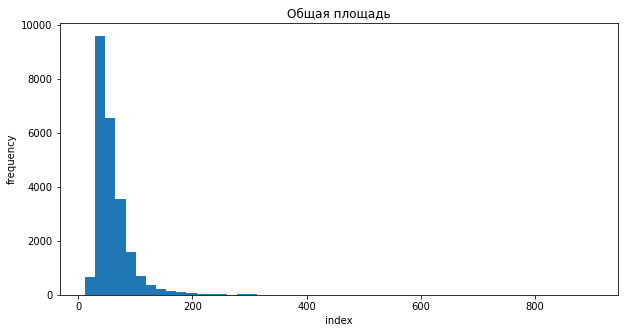

MIN:  12.0
MAX:  900.0
MEAN:  60.34865099793241
MEDIAN:  52.0

last_price


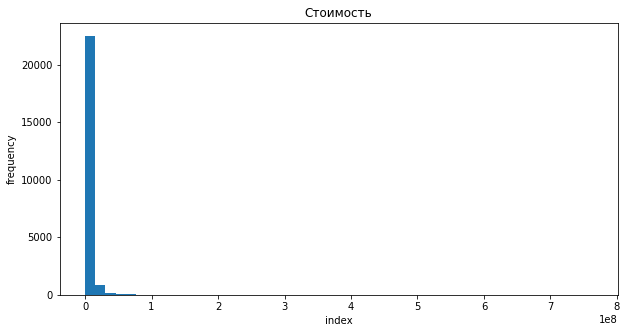

MIN:  12190
MAX:  763000000
MEAN:  6541548.771551542
MEDIAN:  4650000.0

rooms


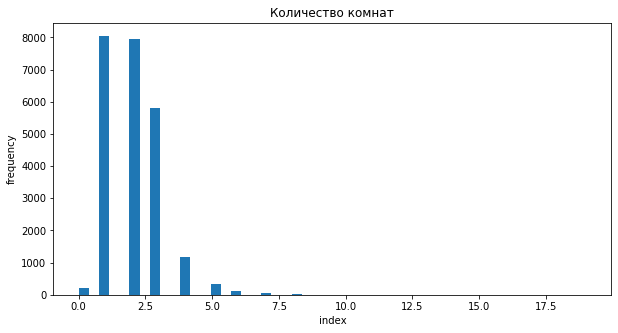

MIN:  0
MAX:  19
MEAN:  2.070635891809781
MEDIAN:  2.0

ceiling_height


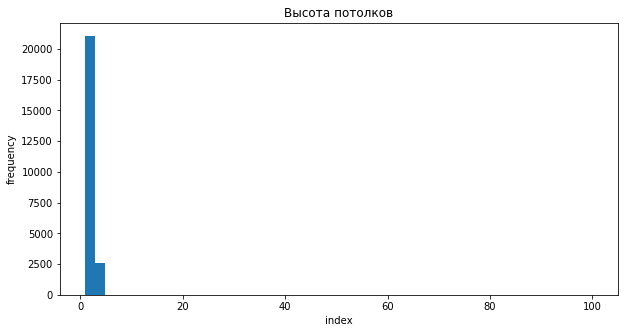

MIN:  1.0
MAX:  100.0
MEAN:  2.724358411747331
MEDIAN:  2.65



In [72]:
params = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for par in params:
    print(par)
    m = 'string'
    if par == 'total_area':
        m = 'Общая площадь'
    elif par == 'last_price':
        m = 'Стоимость'
    elif par == 'rooms':
        m = 'Количество комнат'
    elif par == 'ceiling_height':
        m = 'Высота потолков'
   
    df[par].plot(kind='hist', figsize=(10,5), bins=50, grid=False, title=m)
    plt.xlabel('index')
    plt.ylabel('frequency')
    plt.show()
    
    print('MIN: ', df[par].min())
    print('MAX: ', df[par].max())
    print('MEAN: ', df[par].mean())
    print('MEDIAN: ', df[par].median())
    print()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Все 4 параметра имеют вбросы, нужно их отфильтровать.
        <li>'total_area' судя по графику, можно сохранить значения от 0 до 300, дальше уже идут редковстречающиеся значения</li>
        <li>'last_price' также крайне редко встречаются сверх 80 млн</li>
        <li>'rooms' оставим значения менее или ровно 10 комнатам</li>
        <li>'ceiling_height' - высота патолков реально бывает от 2 до максимум 4 метром, отбросим иные значения</li>
</div>

In [73]:
  df = df.query('total_area <= 300')
  df = df.query('last_price <= 0.8*10**8')
  df = df.query('rooms <= 10')
  df = df.query('2 <= ceiling_height <= 4')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> Проверим как изменились гистограммы и параметры
</div>

total_area


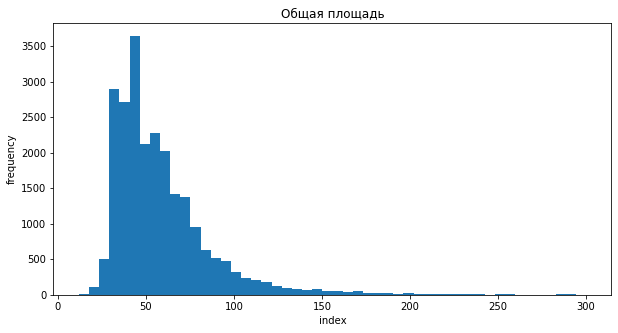

MIN:  12.0
MAX:  300.0
MEAN:  59.11029411764706
MEDIAN:  52.0

last_price


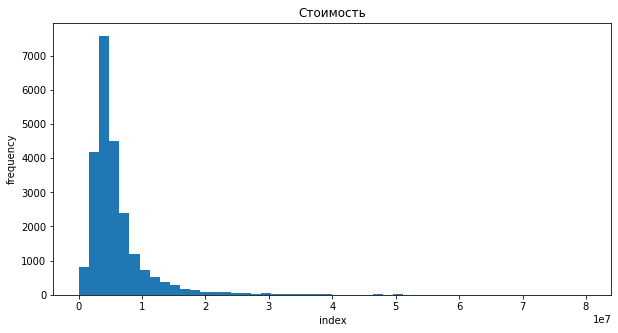

MIN:  12190
MAX:  80000000
MEAN:  6100101.944619177
MEDIAN:  4600000.0

rooms


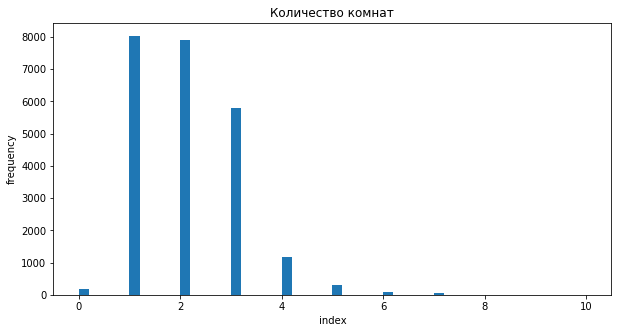

MIN:  0
MAX:  10
MEAN:  2.0529581774906496
MEDIAN:  2.0

ceiling_height


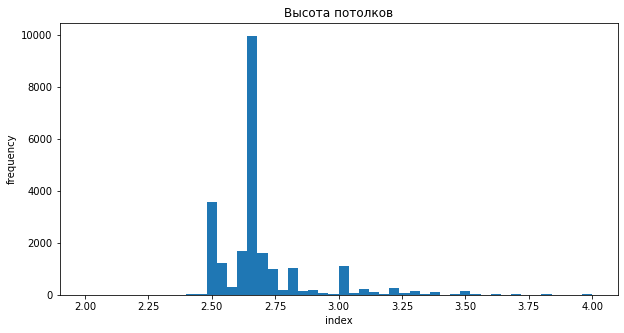

MIN:  2.0
MAX:  4.0
MEAN:  2.691883713022781
MEDIAN:  2.65



In [74]:
for par in params:
    print(par)
    m = 'string'
    if par == 'total_area':
        m = 'Общая площадь'
    elif par == 'last_price':
        m = 'Стоимость'
    elif par == 'rooms':
        m = 'Количество комнат'
    elif par == 'ceiling_height':
        m = 'Высота потолков'
   
    df[par].plot(kind='hist', figsize=(10,5), bins=50, grid=False, title=m)
    plt.xlabel('index')
    plt.ylabel('frequency')
    plt.show()
    
    print('MIN: ', df[par].min())
    print('MAX: ', df[par].max())
    print('MEAN: ', df[par].mean())
    print('MEDIAN: ', df[par].median())
    print()

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Гистограммы здорово построены, молодец. Дополнительно для всех графиков стоит делать развернутые заголовки и понятные подписи осей
    
</div>

выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 
Опишите, сколько обычно занимает продажа. 
Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Изучим время продажи квартир. 
<p> Посмотрим на гистограмму.
</div>

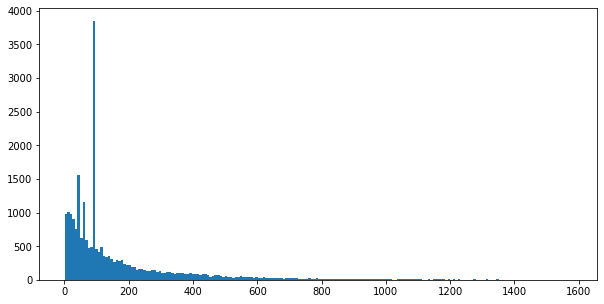

In [115]:
df['days_exposition'].hist(figsize=(10,5), bins=200, grid=False)
plt.show()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p>Из гистограммы видно, что чаще всего квартиры покупают с первых дней по 200 день с момента публикации объявления.
<p>Есть периоды, когда продажи идут особенно интенсивно. Вероято в эти дни объявления поднимают в топ.
<p>Рассмотрим эти пиковые значения более внимательно (просмотрим начальные 200 значений гистограммы, распределение значений, среднее и медианное значение).
</div>

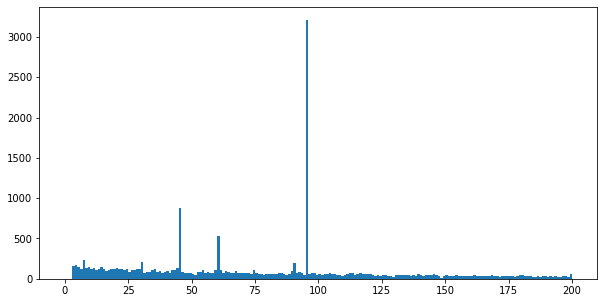

95    3211
45     879
60     537
7      233
30     207
90     202
4      176
3      158
5      151
14     144
9      142
44     138
20     138
8      137
11     135
13     127
10     127
18     126
28     125
22     125
Name: days_exposition, dtype: int64
mean =  168.85323869432165
median =  95.0


In [116]:
df['days_exposition'].hist(figsize=(10,5), bins=200, grid=False, range=(0,200))
plt.show()
print(df['days_exposition'].value_counts().head(20))
print('mean = ', df['days_exposition'].mean())
print('median = ', df['days_exposition'].median())

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Максимальное значение приходится на значение 95, что соответствует нашей медиане.
<p> Далее в порядке убывания идут значения: 45, 60, 7, 30, 90. Вероятно в эти дни публикации выходят в топ.
</div>

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Нужно убрать те значения которые встречаются редко (хвост гистограммы), при этом чтобы % отфильтрованных данных было более 5%. 
</div>

In [117]:
days_exposition_slice = df.query('days_exposition < 650')
# days_exposition_slice = days_exposition_slice.query('days_exposition != 95')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Посмотрим как изменилась гистограмма, среднее и медианное значение
</div>

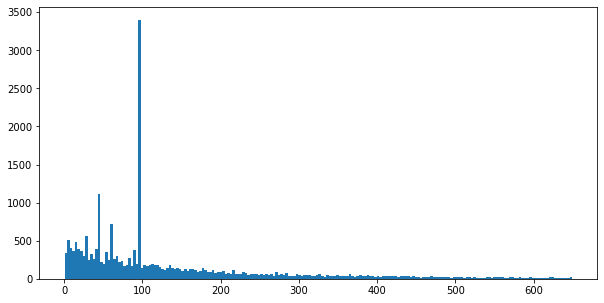

mean =  136.62109375
median =  95.0


In [118]:
days_exposition_slice['days_exposition'].hist(figsize=(10,5), bins = 200, grid=False)
plt.show()
print('mean = ', days_exposition_slice['days_exposition'].mean())
print('median = ', days_exposition_slice['days_exposition'].median())

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Посчитаем процент отфильтрованных элементов
</div>

In [119]:
print('Процент отфильтрованных элементов: {:.2%}'.format(
    len(days_exposition_slice['days_exposition']) / len(df['days_exposition'])))

Процент отфильтрованных элементов: 95.75%


<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
    <p> <b>Вывод:</b> Таким образом, максимальный шанс продать квартиру находится около 95 дня с момента подачи объявления.
</div>

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Определим какие факторы больше всего влияют на стоимость квартиры.
<p>Проанализируем следующие факторы: стоимость, общая площадь, количество комнат, удаленность от центра города, этаж.
<p> Для этого вызовем метод plotting.scatter_matrix, передав эти значения в качестве параметра
</div>

,last_price,total_area,rooms,cityCenters_nearest,apartment_floor
last_price,1.000000,0.761694,0.469531,-0.293524,0.055368
total_area,0.761694,1.000000,0.788467,-0.226709,0.052327
rooms,0.469531,0.788467,1.000000,-0.160804,0.018751
cityCenters_nearest,-0.293524,-0.226709,-0.160804,1.000000,-0.023001
apartment_floor,0.055368,0.052327,0.018751,-0.023001,1.000000


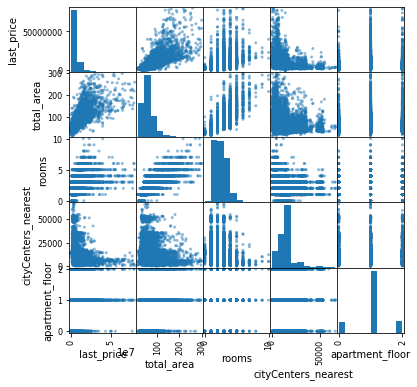

In [135]:
df_corr = df[['last_price', 
              'total_area', 
              'rooms', 
              'cityCenters_nearest', 
              'apartment_floor']]
display(df_corr.corr())
pd.plotting.scatter_matrix(df_corr, figsize=(6, 6))
plt.show()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Исходя из данных корреляции больше всего на стоимость квартиры влияет общая площадь (прямопропорционально), 
затем количество комнат (прямопропорционально) и удаленность от центра (обратнопропорционально)
    <p>
    <p> Повторим то же самое с днем, месяцем и годом публикации.
</div>

In [ ]:
df_corr = df[['last_price', 
              'day_week_exposition', 
              'month_exposition', 
              'year_exposition', 
              'first_day_exposition']]
display(df_corr.corr())

pd.plotting.scatter_matrix(df_corr, figsize=(10, 10))
plt.show()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Исходя из корреляций, нет никакой зависимости параметра last_price от дня, месяца и года публикации объявления
</div>

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Выберем 10 населённых пунктов с наибольшим числом объявлений. 
</div>

In [136]:
df_tmp = df.groupby('locality_name')['price_per_square_metr'].count().sort_values(ascending=False).head(10)

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Выделим населённые пункты с самой высокой и низкой стоимостью жилья
</div>

Пункты с самой высокой стоимостью жилья:


,index,new_local_name,last_price
0,204,Репино,1.216685e+07
1,280,Хязельки,1.100000e+07
2,3,Александровская,8.725000e+06
3,215,Санкт-Петербург,7.412940e+06
4,16,Бор,7.098400e+06
5,1,unknown,6.745167e+06
6,230,Сестрорецк,6.341722e+06
7,62,Зеленогорск,6.288338e+06
8,193,Пушкин,6.283536e+06
9,246,Стрельна,4.984500e+06


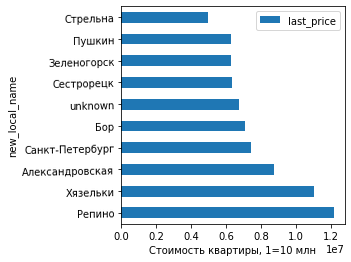


Пункты с самой низкой стоимостью жилья:


,index,new_local_name,last_price
286,228,Серебрянский,742500.0
287,93,Коркино,650000.0
288,282,Цвылево,650000.0
289,275,Фалилеево,650000.0
290,292,Ям-Тесово,625000.0
291,35,Выскатка,585000.0
292,220,Свирь,575000.0
293,237,Совхозный,517500.0
294,242,Старополье,460000.0
295,23,Вахнова,450000.0


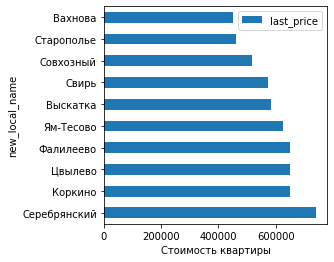

In [152]:
df_tmp = df.pivot_table(index='new_local_name', values='last_price', aggfunc='mean').reset_index()
df_tmp = df_tmp.sort_values(by='last_price', ascending=False).reset_index()
print('Пункты с самой высокой стоимостью жилья:')
display(df_tmp.head(10))
df_tmp.head(10).plot.barh(x='new_local_name', y='last_price', figsize=(4, 4), rot=True)
plt.xlabel('Стоимость квартиры, 1=10 млн')
plt.show()
print()
print('Пункты с самой низкой стоимостью жилья:')
display(df_tmp.tail(10))
df_tmp.tail(10).plot.barh(x='new_local_name', y='last_price', figsize=(4, 4))
plt.xlabel('Стоимость квартиры')
plt.show()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Зависимость цены относительно центра города
</div>

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Выделим все квартиры с именем Санкт-Петербург
</div>

In [156]:
apartments_in_spb = df.query('locality_name == "Санкт-Петербург"')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Создадим сводную таблицу, сводящую цену с степенью удаленности от центра и выведем эти значения на граффик scatter
</div>

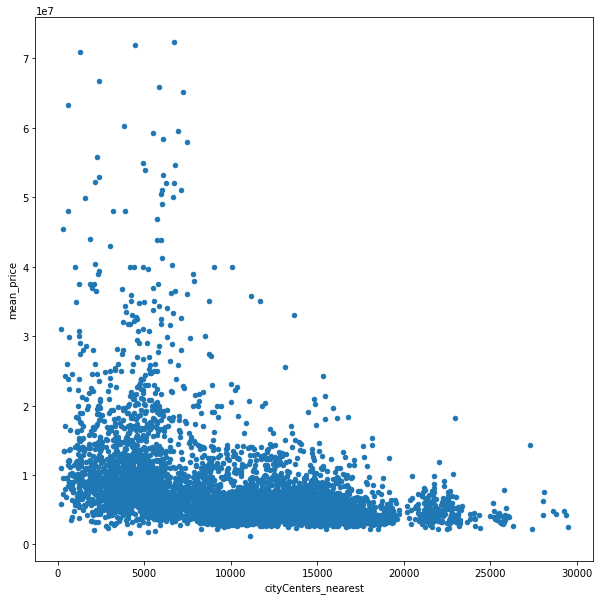

In [159]:
apartments_in_spb_pivot = apartments_in_spb.pivot_table(index='cityCenters_nearest', values = 'last_price', aggfunc='mean').reset_index().rename(columns={'last_price':'mean_price'})
apartments_in_spb_pivot.plot.scatter(x='cityCenters_nearest', y='mean_price', figsize=(10,10))
plt.show()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Из графика видно, что цена за квартиры резко снижаются примерно при удаленности от центра города на 10 км и далее. Таким образом по отношению к центру выборку можно разделить на 2 части:
    <li> менее 10 000 метров от центра - будет относиться к центру города</li>
    <li> более 10 000 метров от центра - будет относиться пригороду</li>
        
</div>

In [161]:
# центр
city_center = df.query('cityCenters_nearest <= 10000')

# пригород
suburb = df.query('cityCenters_nearest > 10000')

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Проведем анализ для центра города       
</div>

Количество квартир в объявлениях, которые продаются в центре: 4975 или 32% от всех объявлений в Санкт-Петерьбурге
Максимальная стоимость квартиры 80000000
Миниальная стоимость квартиры 12190
Средняя стоимость квартиры 10891915.089849247
Медианная стоимость квартиры 8000000.0


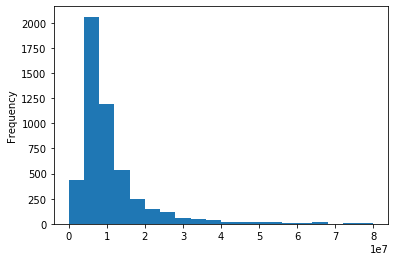

In [183]:
spb_apartment = df.query('new_local_name == "Санкт-Петербург"')
print('Количество квартир в объявлениях, которые продаются в центре: {} или {:.0%} от всех объявлений в Санкт-Петерьбурге'.format(len(city_center), len(city_center)/len(spb_apartment)))
print('Максимальная стоимость квартиры {}'.format(city_center['last_price'].max()))
print('Миниальная стоимость квартиры {}'.format(city_center['last_price'].min()))
print('Средняя стоимость квартиры {}'.format(city_center['last_price'].mean()))
print('Медианная стоимость квартиры {}'.format(city_center['last_price'].median()))
city_center['last_price'].plot.hist(bins=20)
plt.show()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Из гистограммы видно, что больше всего квартир в центре продается в диапазоне цен от 5 до 15 млн. Средняя цена квартиры 8 млн. Есть очень дорогие квартиры до 800 млн, а также около 500 объявлений с ценой за квартиру до 5 млн рублей. Сравним результаты для всего города.
</div>

Количество квартир в объявлениях, которые продаются в центре: 15572 или 66% от всех объявлений в датасете
Максимальная стоимость квартиры 80000000
Миниальная стоимость квартиры 12190
Средняя стоимость квартиры 7412940.395710249
Медианная стоимость квартиры 5500000.0


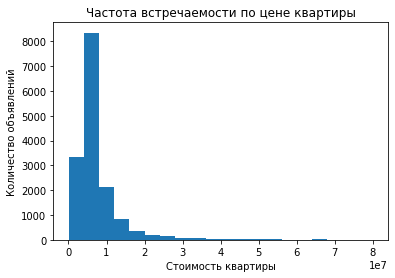

In [186]:
print('Количество квартир в объявлениях, которые продаются в центре: {} или {:.0%} от всех объявлений в датасете'.format(len(spb_apartment), len(spb_apartment)/len(df)))
print('Максимальная стоимость квартиры {}'.format(spb_apartment['last_price'].max()))
print('Миниальная стоимость квартиры {}'.format(spb_apartment['last_price'].min()))
print('Средняя стоимость квартиры {}'.format(spb_apartment['last_price'].mean()))
print('Медианная стоимость квартиры {}'.format(spb_apartment['last_price'].median()))
spb_apartment['last_price'].plot.hist(bins=20, title='Частота встречаемости по цене квартиры')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество объявлений')
plt.show()

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<p> Если рассмотреть гистограмму стоимости квартир по Санкт-Петербургу в целом, чаще всего в объявлениях встречаются предложения с ценой продажи квартиры до 10 млн, более всего от 5 до 10 млн. 
</div>

## Общий вывод

<div style="color: white; border:solid green 2px; padding: 20px; background: LightSeaGreen">
<b>
В результате исследования датасета можно прийти к выводам:
    <li>Стоимость крвартир находится в прямой зависимости от общей площади, количества комнат, и в обратной зависимости от удаленности от центра города. </li>
    <li>Максимально высокий шанс продать квартиру на 95, 90, 60, 45, 30 и 7 сутки от публикации объявления. Вероятно в эти дни объявления приподнимается к топу. Какой-то линейной зависимости между ценой и датой размещения объявления не обнаружено</li>
    <li>Как самые дорогие квартиры (видимо элитное жилье), так и самые дешевые находятся в поселках и деревнях. Санкт-Петербург по стоимости квартир находится на 5 месте топа.</li>
    <li>Центр города Санкт-Петербурга находится внутри окружности, радиусом около 10 км от нулевого километра, квартиры в центре стоят дороже, чем в среднем по городу. Больше объявлений размещается в пригороде</li>
</b>
</div>